# Import modules

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [5]:
df = pd.read_csv('dataset.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
# to display stats about data
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [8]:
# to display no. of samples on each class
df['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

# Preprocessing the dataset

In [9]:
# check for null values
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Index'}>, <AxesSubplot:>]],
      dtype=object)

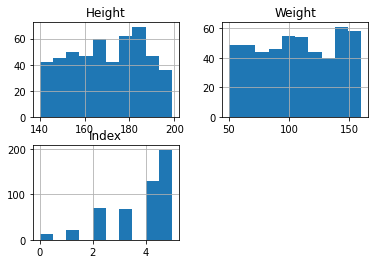

In [10]:
# histograms
df.hist()

# Coorelation Matrix


In [11]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


<AxesSubplot:>

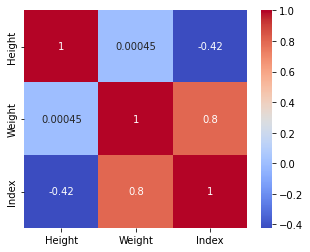

In [12]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

# Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [14]:
df['Gender'] = le.fit_transform(df['Gender'])
df.sample(10)

,Gender,Height,Weight,Index
496,0,184,121,4
279,1,188,57,1
98,1,195,69,1
53,1,172,105,4
259,0,184,132,4
472,0,178,65,2
255,0,162,58,2
41,0,149,108,5
353,1,184,153,5
224,1,188,54,0


# Model Training

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Index'])
Y = df['Index']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [16]:
model = KNeighborsClassifier()
# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  91.2


In [18]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
#     print(prepared_df)
    y_pred = model.predict(df)
    
    if y_pred == 0:
        return 'Extremely Weak'
    elif y_pred == 1:
        return 'Weak'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obesity'
    elif y_pred == 5:
        return 'Extreme Obesity'
    
#     return y_pred
    

In [19]:
config = {
    'Gender': [1],
    'Height': [177],
    'Weight': [188]
}

predict_mpg(config, model)

'Extreme Obesity'

# Create Model File

In [20]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Calculate the accuracy score and predict target values
score = pickle_model.score(x_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(x_test)

Test score: 91.20 %


In [21]:
##loading the model from the saved file
pkl_filename = "model.pkl"
with open(pkl_filename, 'rb') as f_in:
    model = pickle.load(f_in)

predictValue = predict_mpg(config, model)
predictValue

'Extreme Obesity'